<a href="https://colab.research.google.com/github/Ian-Leidner/nyu-python-public-policy/blob/master/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt 

In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head()

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
0,0,0,39888071,08/01/2018 12:00:10 AM,08/01/2018 01:52:46 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Other,10029,200 EAST 109 STREET,EAST 109 STREET,3 AVENUE,2 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:00:10 AM,The mobile outreach response team offered serv...,08/01/2018 01:52:46 AM,11 MANHATTAN,1.016560e+09,MANHATTAN,1000049.0,228317.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.793339,-73.942942,"(40.79333937834769, -73.9429417746998)",111.0
1,1,1,39889166,08/01/2018 12:00:26 AM,08/18/2018 10:46:43 AM,HPD,Department of Housing Preservation and Develop...,DOOR/WINDOW,DOOR,RESIDENTIAL BUILDING,10031,528 WEST 136 STREET,WEST 136 STREET,NaN,NaN,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,NaN,The Department of Housing Preservation and Dev...,08/18/2018 10:46:43 AM,09 MANHATTAN,1.019880e+09,MANHATTAN,997239.0,238074.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.820124,-73.953071,"(40.82012422332215, -73.9530712339799)",109.0
2,2,2,39882869,08/01/2018 12:00:54 AM,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0
3,3,3,39894246,08/01/2018 12:01:00 AM,08/02/2018 10:30:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)",105.0
4,4,4,39881329,08/01/2018 12:01:00 AM,08/05/2018 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)",412.0


In [0]:
df.created_date = pd.to_datetime(df.created_date, format='%m/%d/%Y %I:%M:%S %p')
df.closed_date = pd.to_datetime(df.closed_date, format='%m/%d/%Y %I:%M:%S %p')

In [0]:
#Step 1. Create a list of the top 10 complaint types (i.e. the complaint type categories that have the most records in our 311 dataset). Save the list as an object called top_10.

In [0]:
top_10 = df.groupby('complaint_type').size().nlargest(10).reset_index(name='Count')

In [9]:
top_10.head(10)

,complaint_type,Count
0,Noise - Residential,236350
1,HEAT/HOT WATER,205985
2,Illegal Parking,195159
3,Request Large Bulky Item Collection,177175
4,Blocked Driveway,145446
5,Noise - Street/Sidewalk,95977
6,Street Condition,93341
7,UNSANITARY CONDITION,81713
8,Water System,70509
9,Noise,59007


In [0]:
#Step 2. Filter the 311 dataset to only 311 requests that have complaint types in top_10. Save this subset of data as a dataframe called filtered_311.

In [0]:
filtered_311 = df[df.complaint_type.isin(top_10.complaint_type)]

In [12]:
filtered_311.head()

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
2,2,2,39882869,2018-08-01 00:00:54,2018-08-01 00:49:55,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0
3,3,3,39894246,2018-08-01 00:01:00,2018-08-02 22:30:00,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)",105.0
4,4,4,39881329,2018-08-01 00:01:00,2018-08-05 00:00:00,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)",412.0
5,5,5,39882413,2018-08-01 00:01:09,2018-08-01 02:08:54,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11211,381 SOUTH 3 STREET,SOUTH 3 STREET,HOOPER STREET,HEWES STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:01:09 AM,The Police Department responded and upon arriv...,08/01/2018 02:08:54 AM,01 BROOKLYN,3.024250e+09,BROOKLYN,997494.0,197502.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708764,-73.952230,"(40.70876421021247, -73.95222986727623)",301.0
6,6,6,39884833,2018-08-01 00:01:10,2018-08-05 01:10:41,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10033,612 WEST 180 STREET,WEST 180 STREET,ST NICHOLAS AVENUE,WADSWORTH AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,08/01/2018 08:01:10 AM,The Police Department responded to the complai...,08/05/2018 01:10:41 AM,12 MANHATTAN,1.021620e+09,MANHATTAN,1002311.0,248532.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.848819,-73.934718,"(40.84881949308954, -73.93471813672973)",112.0


In [0]:
#Step 3. Convert the created_date column in filtered_311 to be a datetime series.
#See above step 1

In [0]:
#Step 4. Create 6 new columns in filtered_311 that extract each of the following from created_date

In [15]:
filtered_311['year'] = df.created_date.dt.year
filtered_311['date'] = df.created_date.dt.date
filtered_311['month'] = df.created_date.dt.month
filtered_311['weekday_name'] = df.created_date.dt.weekday_name
filtered_311['weekday'] = df.created_date.dt.weekday
filtered_311['hour'] = df.created_date.dt.hour

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [16]:
filtered_311.head()

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd,year,date,month,weekday_name,weekday,hour
2,2,2,39882869,2018-08-01 00:00:54,2018-08-01 00:49:55,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0,2018,2018-08-01,8,Wednesday,2,0
3,3,3,39894246,2018-08-01 00:01:00,2018-08-02 22:30:00,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)",105.0,2018,2018-08-01,8,Wednesday,2,0
4,4,4,39881329,2018-08-01 00:01:00,2018-08-05 00:00:00,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)",412.0,2018,2018-08-01,8,Wednesday,2,0
5,5,5,39882413,2018-08-01 00:01:09,2018-08-01 02:08:54,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11211,381 SOUTH 3 STREET,SOUTH 3 STREET,HOOPER STREET,HEWES STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:01:09 AM,The Police Department responded and upon arriv...,08/01/2018 02:08:54 AM,01 BROOKLYN,3.024250e+09,BROOKLYN,997494.0,197502.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708764,-73.952230,"(40.70876421021247, -73.95222986727623)",301.0,2018,2018-08-01,8,Wednesday,2,0
6,6,6,39884833,2018-08-01 00:01:10,2018-08-05 01:10:41,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10033,612 WEST 180 STREET,WEST 180 STREET,ST NICHOLAS AVENUE,WADSWORTH AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,08/01/2018 08:01:10 AM,The Police Department responded to the complai...,08/05/2018 01:10:41 AM,12 MANHATTAN,1.021620e+09,MANHATTAN,1002311.0,248532.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.848819,-73.934718,"(40.84881949308954, -73.93471813672973)",112.0,2018,2018-08-01,8,Wednesday,2,0


In [0]:
#Step 5. Trends by hour

In [0]:
complaints_per_date_hour = filtered_311[['date', 'hour', 'complaint_type']].groupby(['hour', 'date','complaint_type']).size().reset_index(name='count_requests')

In [19]:
complaints_per_date_hour.head()

,hour,date,complaint_type,count_requests
0,0,2018-08-01,Blocked Driveway,8
1,0,2018-08-01,HEAT/HOT WATER,4
2,0,2018-08-01,Illegal Parking,11
3,0,2018-08-01,Noise,9
4,0,2018-08-01,Noise - Residential,29


In [0]:
hour_median = complaints_per_date_hour[['hour', 'complaint_type', 'count_requests', 'date']].groupby(['hour', 'complaint_type']).count_requests.median().reset_index(name='median_requests')


In [21]:
hour_median.head(11)

,hour,complaint_type,median_requests
0,0,Blocked Driveway,13.0
1,0,HEAT/HOT WATER,11.0
2,0,Illegal Parking,15.0
3,0,Noise,6.0
4,0,Noise - Residential,41.0
5,0,Noise - Street/Sidewalk,15.0
6,0,Request Large Bulky Item Collection,5.0
7,0,Street Condition,3.0
8,0,UNSANITARY CONDITION,3.0
9,0,Water System,2.0


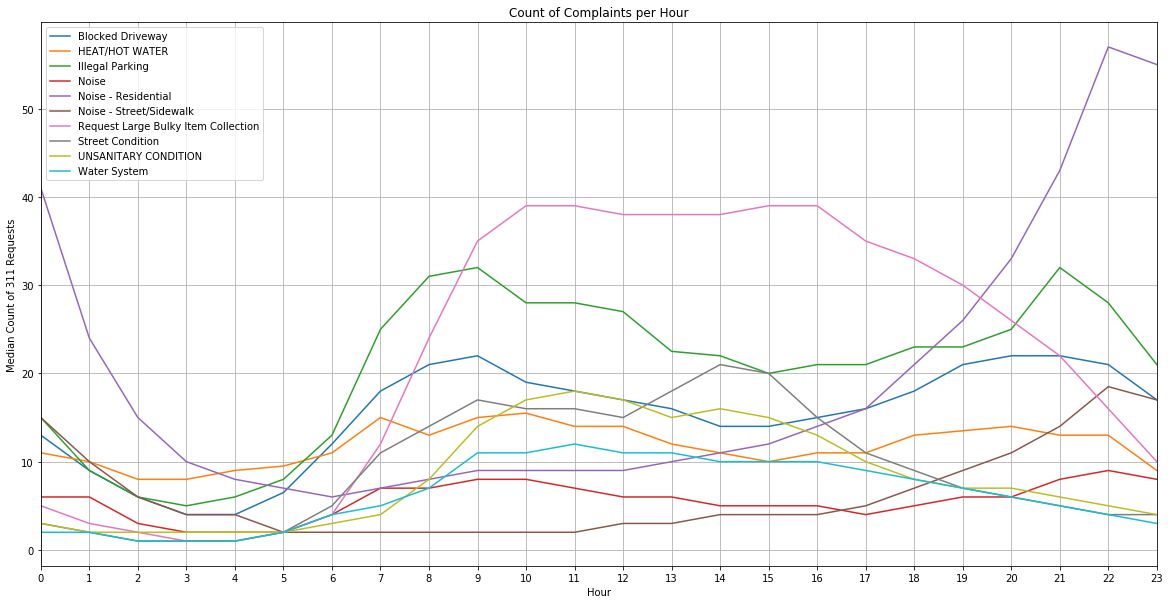

In [40]:
hour_median_pivot = hour_median.pivot(index='hour', columns='complaint_type', values='median_requests')
hour_median_pivot.plot(xticks=list(set(hour_median.hour.tolist())), figsize=(20,10))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.title('Count of Complaints per Hour')
plt.xlabel('Hour')
plt.ylabel('Median Count of 311 Requests')
plt.legend()


In [0]:
#Step 6. Trends by day of week

In [0]:
complaints_per_weekday = filtered_311[['date', 'weekday', 'complaint_type']].groupby(['date', 'weekday','complaint_type'])['complaint_type'].size().reset_index(name='count_requests')

In [25]:
complaints_per_weekday.head()

,date,weekday,complaint_type,count_requests
0,2018-08-01,2,Blocked Driveway,311
1,2018-08-01,2,HEAT/HOT WATER,101
2,2018-08-01,2,Illegal Parking,438
3,2018-08-01,2,Noise,173
4,2018-08-01,2,Noise - Residential,331


In [0]:
weekday_median = complaints_per_weekday[['weekday', 'complaint_type', 'count_requests']].groupby(['weekday', 'complaint_type'])['count_requests'].median().reset_index(name='median_requests')


In [27]:
weekday_median.head()

,weekday,complaint_type,median_requests
0,0,Blocked Driveway,372.0
1,0,HEAT/HOT WATER,292.0
2,0,Illegal Parking,509.0
3,0,Noise,147.0
4,0,Noise - Residential,419.0


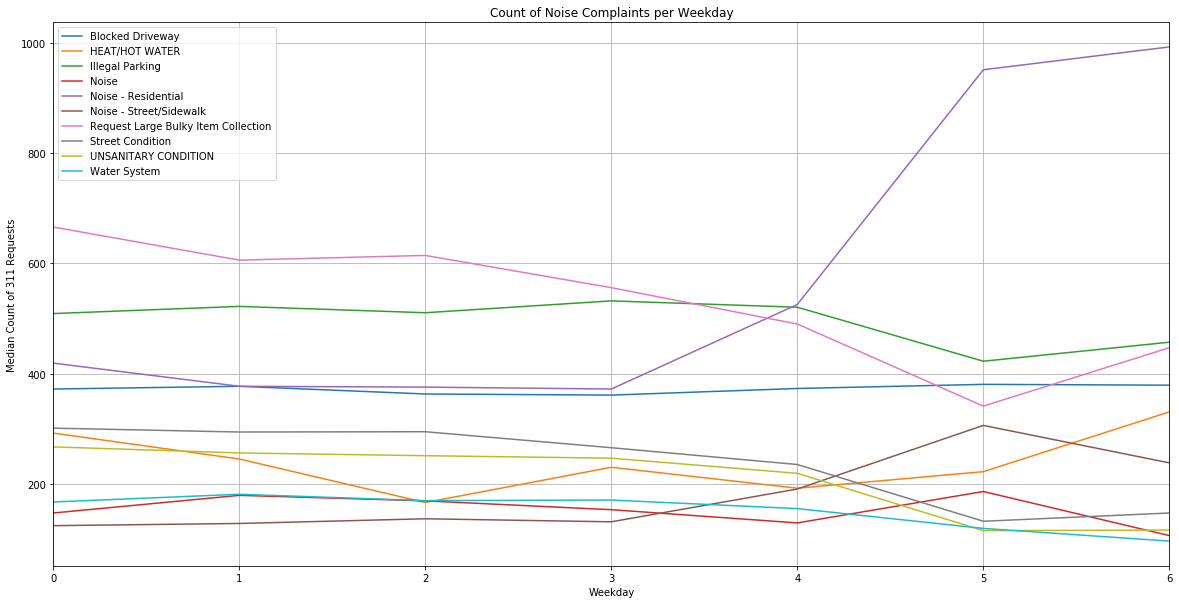

In [42]:
weekday_median_pivot = weekday_median.pivot(index='weekday', columns='complaint_type', values='median_requests')
weekday_median_pivot.plot(xticks=list(set(weekday_median.weekday.tolist())), figsize=(20,10))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.title('Count of Noise Complaints per Weekday')
plt.xlabel('Weekday')
plt.ylabel('Median Count of 311 Requests')
plt.legend()

In [0]:
#Step 7. Trends by month

In [0]:
complaints_per_month = filtered_311[['month', 'year', 'complaint_type']].groupby(['month', 'year','complaint_type'])['complaint_type'].size().reset_index(name='count_requests')

In [31]:
complaints_per_month.head()

,month,year,complaint_type,count_requests
0,1,2019,Blocked Driveway,11393
1,1,2019,HEAT/HOT WATER,46387
2,1,2019,Illegal Parking,13189
3,1,2019,Noise,4805
4,1,2019,Noise - Residential,16176


In [0]:
monthly_median = complaints_per_month[['month', 'year', 'complaint_type', 'count_requests']].groupby(['month', 'complaint_type'])['count_requests'].median().reset_index(name='median_requests')


In [33]:
monthly_median.head()

,month,complaint_type,median_requests
0,1,Blocked Driveway,11393.0
1,1,HEAT/HOT WATER,46387.0
2,1,Illegal Parking,13189.0
3,1,Noise,4805.0
4,1,Noise - Residential,16176.0


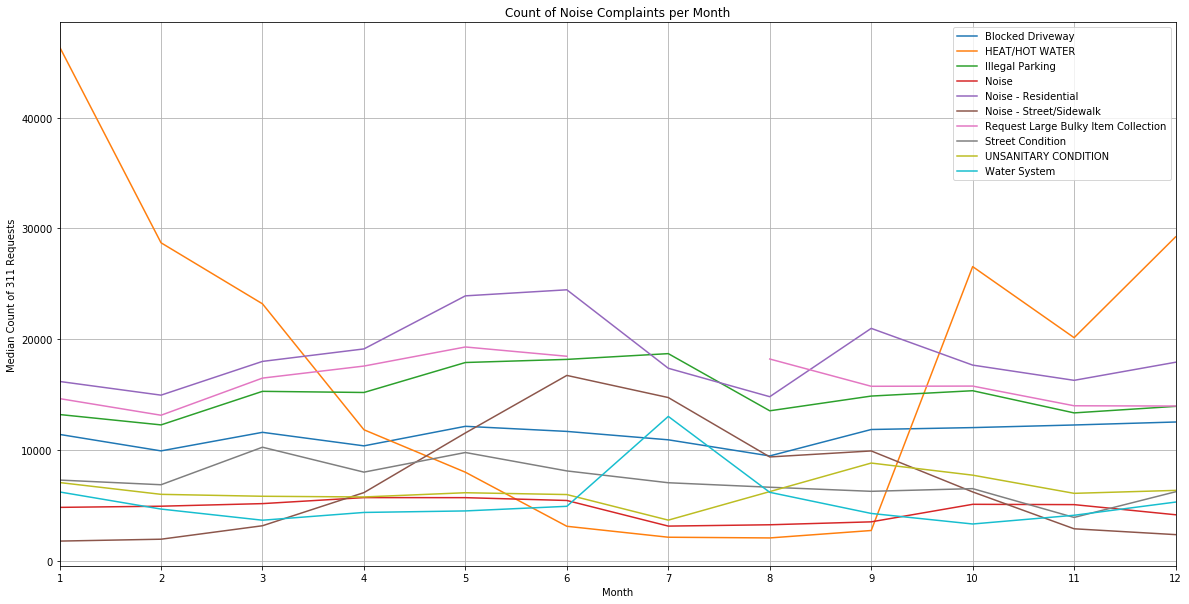

In [43]:
monthly_median_pivot = monthly_median.pivot(index='month', columns='complaint_type', values='median_requests')
monthly_median_pivot.plot(xticks=list(set(monthly_median.month.tolist())), figsize=(20,10))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.title('Count of Noise Complaints per Month')
plt.xlabel('Month')
plt.ylabel('Median Count of 311 Requests')
plt.legend()

In [0]:
#Step 8. Write a few sentences with your observations on how the occurrence of different complaint types varies over time, informed by the charts you produced in Steps 5-7.

#Hour by hour, many of the top 10 complaint categories spike during the morning commute when many people are first out of the house. Complaints like illegal parking and blocked driveway spike then and again in the evening. Unsurprisingly, Noise-Residential goes up around 10pm because of night life. 

#In the weekday section, Noise-Residential goes up on weekends. Most other categories remain relatively flat. Large bulky item requests actually decrease on the weekend. 

#Month by month, the clearest trend is around heat and hot water requests, which sky-rocket during the winter months. Noise complaints on the sidewalk and residential seem to go up in the summer when people are outside more, but not uncategorized noise complaints.  